In [3]:
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Let's generate some random data

In [4]:
## PARAMS
# points per cluster
NPOINTS = 100

# max distance from centroid
# try 20, 60 and 200
MAX_CLUST_DIST = 200

# min/max X & Y axis
MIN = 0
MAX = 400

# some centroids, feel free to play around with this
CENTROIDS = [(165, 210), 
             (122, 20), 
             (360, 360),
            (225, 290),
            (300, 100),
            (0, 35)]

In [5]:
points = [c for c in CENTROIDS]


for c in CENTROIDS:
    # find min, max bounds
    xmin, xmax = c[0] - MAX_CLUST_DIST, c[0] + MAX_CLUST_DIST
    ymin, ymax = c[1] - MAX_CLUST_DIST, c[1] + MAX_CLUST_DIST
    ymin, ymax = max(0, ymin), min(MAX, ymax)
    xmin, xmax = max(0, xmin), min(MAX, xmax)
    
    # generate random points
    for i in range(0, NPOINTS):
        x, y = random.randint(xmin, xmax), random.randint(ymin, ymax)
        points.append((x,y))

# write out to cluster.csv
with open('cluster.csv', 'w') as f:
    f.write("Point Name\tX\tY\n")
    for i, p in enumerate(points):
        f.write("Point {0}\t{1}\t{2}\n".format(i+1, p[0], p[1]))
        
    


## Import our randomly generated dataset

In [6]:
df = pd.read_csv('cluster.csv', sep='\t')

In [7]:
df.head()

,Point Name,X,Y
0,Point 1,165,210
1,Point 2,122,20
2,Point 3,360,360
3,Point 4,225,290
4,Point 5,300,100


In [8]:
len(df)

606

### Now, we extract just the X & Y columns

In [9]:
matrix = df.iloc[:, 1:]
matrix.head()

,X,Y
0,165,210
1,122,20
2,360,360
3,225,290
4,300,100


### Lets look at our data

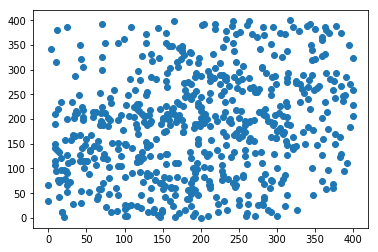

In [10]:
plt.scatter(matrix['X'], matrix['Y'])
plt.show()

## Gaussian Mixture Modeling

In [11]:
# Use N=6 clusters
GMM_N = 6

In [12]:
gmm = GaussianMixture(n_components=GMM_N, random_state=0).fit(matrix)
gmm_pred = gmm.predict(matrix)
centers = gmm.means_
print(centers)

[[ 41.58906921 150.11871431]
 [165.78573277 215.95218222]
 [189.679328   358.98321734]
 [348.8270462  285.74837925]
 [285.0476323  181.86271927]
 [190.10612184  54.91207003]]


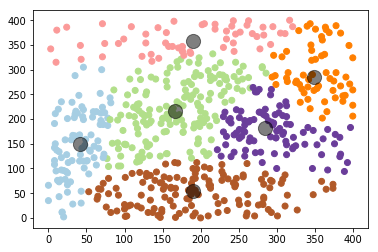

In [13]:
plt.scatter(matrix['X'], matrix['Y'], c=gmm_pred, cmap=plt.cm.Paired)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

### KMeans Clustering

In [14]:
# Use N=6 clusters
KMEANS_N = 6

In [15]:

cluster = KMeans(n_clusters=KMEANS_N, random_state=0).fit(matrix)

# labels
kmeans_pred = cluster.predict(matrix)

kmeans_centers = cluster.cluster_centers_
print(centers)

[[ 41.58906921 150.11871431]
 [165.78573277 215.95218222]
 [189.679328   358.98321734]
 [348.8270462  285.74837925]
 [285.0476323  181.86271927]
 [190.10612184  54.91207003]]


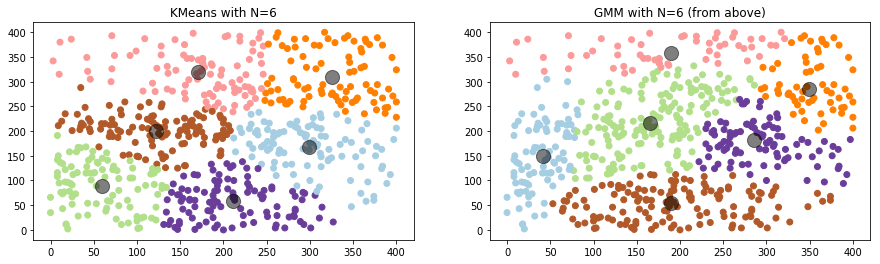

In [16]:

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.title("KMeans with N={}".format(KMEANS_N))
plt.scatter(matrix['X'], matrix['Y'], c=kmeans_pred, cmap=plt.cm.Paired)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=200, alpha=0.5);

plt.subplot(1,2,2)
plt.title("GMM with N={} (from above)".format(GMM_N))
plt.scatter(matrix['X'], matrix['Y'], c=gmm_pred, cmap=plt.cm.Paired)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


plt.show()

## We can predict the quality of KMeans Clustering with the silhouette score
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [17]:
silhouette_score(matrix, kmeans_pred)

0.3524300910953656

### Let's vary the number of clusters for KMeans

In [18]:
def do_kmeans(matrix, num_clusters):
    cluster = KMeans(n_clusters=num_clusters, random_state=0).fit(matrix)
    kmeans_pred = cluster.predict(matrix)
    return silhouette_score(matrix, kmeans_pred)

In [19]:
N = [i for i in range (2, 20)]
scores = [do_kmeans(matrix, i) for i in N]

for i in range(0, len(N)):
    print("For n={}, score={:.3f}".format(N[i], scores[i]))

For n=2, score=0.383
For n=3, score=0.368
For n=4, score=0.360
For n=5, score=0.355
For n=6, score=0.352
For n=7, score=0.353
For n=8, score=0.358
For n=9, score=0.348
For n=10, score=0.354
For n=11, score=0.363
For n=12, score=0.351
For n=13, score=0.365
For n=14, score=0.373
For n=15, score=0.376
For n=16, score=0.377
For n=17, score=0.380
For n=18, score=0.374
For n=19, score=0.371


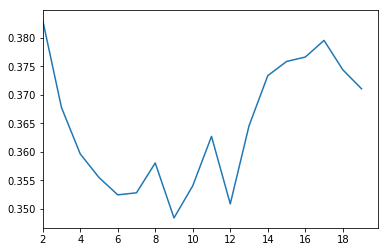

In [20]:
f, ax = plt.subplots(1)
xdata = N
ydata = scores
ax.plot(xdata, ydata)
ax.set_xlim(xmin=2)
plt.show(f)



### Lets try KMeans with the recommended number of clusters

In [21]:
# our list index starts from 0, but our clustering starts from N=2
recommended_N = scores.index(max(scores)) + 2
recommended_N


2

In [22]:
cluster_recommended = KMeans(n_clusters=recommended_N, random_state=0).fit(matrix)

# labels
kmeans_pred_recommended = cluster_recommended.predict(matrix)

centers_recommended = cluster_recommended.cluster_centers_
print(centers)

[[ 41.58906921 150.11871431]
 [165.78573277 215.95218222]
 [189.679328   358.98321734]
 [348.8270462  285.74837925]
 [285.0476323  181.86271927]
 [190.10612184  54.91207003]]


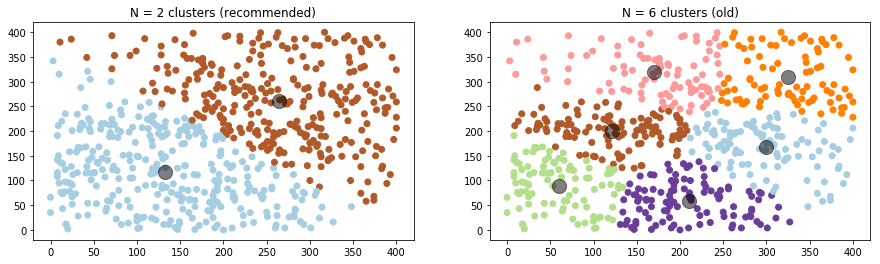

In [23]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.title("N = {} clusters (recommended)".format(recommended_N))
plt.scatter(matrix['X'], matrix['Y'], c=kmeans_pred_recommended, cmap=plt.cm.Paired)
plt.scatter(centers_recommended[:, 0], centers_recommended[:, 1], c='black', s=200, alpha=0.5);

plt.subplot(1,2,2)
plt.title("N = {} clusters (old)".format(KMEANS_N))
plt.scatter(matrix['X'], matrix['Y'], c=kmeans_pred, cmap=plt.cm.Paired)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()